* Nama : Nadira Irsalina
* ID Camp : DBA2134265
* Kelompok : 257
* Departemet : Products
* Kelas : DBAA12


# Outline:

### **Load & Explore Data**
### **Data Understanding**
### **Exploratory Data Analysis**
### **Data Analysis**
### **Modelling**




# PT Bebeyi Fashion Indonesia
## Product Departement Classification

## **0 Data Loading & Exploration**

Data yang akan digunakan adalah data yang disediakan oleh Ruangguru khusus untuk Final Project Data, Bussiness Analytics Operations. Dataset terbagi menjadi dua kategori yaitu dataset utama (primary) dan dataset pendukung
(secondary). Yang mana  Data yang disediakan adalah Data terkait dengan product di suatu perusahaan, yang berisi terkait dengan Detail product, nama, kategori, Waktu produk dibuat, Waktu produk terjual dan lain-lain.
 









## Data Understanding

### 1.	IDENTIFIKASI DATASET
Data yang akan digunakan pada departemen produk adalah dataset utama yaitu Inventory item dan dataset pendukung yang saya gunakan adalah dataset item order dan distribution center. Alasan saya menggunakan dataset tersebut dikarenakan cukup cocok dalam memenuhi tujuan bisnis pada departemen product dan memperoleh insight untuk perubahan bisnis kedepannya.'

### 2. KONSEP DATA SET
1.	Data Primary (Inventory Items) =
Pada data inventory item merupakan data yang berisi tentang keterangan suatu produk mulai dari produk tersebut dibuat,jenis,kategori,brand hingga berisi keterangan kapan produk tersebut habis terjual dan lainnya. Dataset ini memiliki jumlah kolom 375865, dan baris 12.
2.	Dataset Secondary (orders) =
Dataset ini digunakan untuk melengkapi data primary. Data ini dibutuhkan untuk mengetahui data status produk yang diorder oleh pembeli. Data ini cukup penting dikarenakan banyak data yang tidak ada dalam data primer yang sekiranya cukup penting untuk dicantumkan, Jumlah kolom pada data ini 124512 dan 9 baris.
3.	Dataset Secondary (Distribution center) =
Dataset ini adalah data pelengkap yang digunakan untuk membuat maps pada tableu berdasarkan id distribution yang telah ada dalam data primary, tujuannya adalah mengetahui sebaran penjualan produk / daerah mana saja yang membeli produk.

### VARIABEL YANG DIGUNAKAN
1. Data Primary (Inventory Items)
Saya menggunakan semua variabel kecuali product sku karena tidak dibutuhkan. variabel yang saya gunakan adalah 'id', 'product_id', 'created_at', 'sold_at', 'cost', 'product_category', 'product_name', 'product_brand', 'product_retail_price', 'product_department', 'product_distribution_center_id'.
2. Dataset Secondary items order
Saya menggunakan variable yang belum ada dalam data primer. variabel yang saya gunakan yaitu order_id,user_id                  ,inventory_item_id, shipped_at delivered_at dan returned_at. Yang paling penting yaitu variable status produk.
3. Dataset Secondary distribution center
Saya menggunakan semua variable karena dirasa penting digunakan untuk membuat maps di tableau, 'id', 'name', 'latitude', 'longitude'.



## **Data Primary (Inventory Items)**

## **1 Libraries**

Cell berikut berisi semua _library_ yang akan akan gunakan.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import seaborn as sns
from pprint import pprint
from datetime import datetime
from pandas import Series

from scipy import stats
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import norm, skew #for some statistics
from scipy import stats #qqplot
import statsmodels.api as sm #for decomposing the trends, seasonality etc.

import re
import string
import nltk
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,classification_report
from sklearn import tree

In [2]:
data = pd.read_csv('inventory_items.csv')
data.head() # Mengimpor File dan memunculkan data head.

,id,product_id,created_at,sold_at,cost_product,product_category,product_name,product_brand,product_retail_price,product_department,product_sku,product_distribution_center_id
0,90967.0,16898.0,2021-07-19 02:20:10+00:00,2021-07-20 14:34:10+00:00,13.925,Tops & Tees,Quiksilver Waterman Men's On The Rise,NaN,25.0,Men,22811EE19846217512507785E74D12CC,3.0
1,90968.0,16898.0,2020-04-13 07:46:00+00:00,NaN,13.925,Tops & Tees,Quiksilver Waterman Men's On The Rise,NaN,25.0,Men,22811EE19846217512507785E74D12CC,3.0
2,90969.0,16898.0,2020-09-02 17:43:00+00:00,NaN,13.925,Tops & Tees,Quiksilver Waterman Men's On The Rise,NaN,25.0,Men,22811EE19846217512507785E74D12CC,3.0
3,90970.0,16898.0,2021-08-19 15:17:00+00:00,NaN,13.925,Tops & Tees,Quiksilver Waterman Men's On The Rise,NaN,25.0,Men,22811EE19846217512507785E74D12CC,3.0
4,96715.0,16898.0,2020-05-09 11:16:10+00:00,2020-06-23 23:59:10+00:00,13.925,Tops & Tees,Quiksilver Waterman Men's On The Rise,NaN,25.0,Men,22811EE19846217512507785E74D12CC,3.0


In [3]:
data.describe()

,id,product_id,cost_product,product_retail_price,product_distribution_center_id
count,375863.000000,375863.000000,375863.000000,375863.000000,375863.000000
mean,243862.035606,15471.124375,26.975910,55.874503,5.046709
std,140827.043776,8465.142925,27.814531,59.425964,2.923890
min,1.000000,1.000000,0.008300,0.020000,1.000000
25%,121984.500000,8133.000000,11.033400,23.850000,2.000000
50%,243772.000000,16346.000000,19.489821,39.580002,5.000000
75%,366024.500000,22882.500000,32.880000,66.330002,8.000000
max,487390.000000,29120.000000,557.151002,990.000000,10.000000


**Insights:**

Dari data tersebut cost (Harga asli produk) tertinggi yaitu 557.151002 dan retail_price (Harga retail produk) tertinggi yaitu 999.000000

In [4]:
data.tail(
) # Fungsi yang menampilkan n baris terakhir dari kumpulan data.

,id,product_id,created_at,sold_at,cost_product,product_category,product_name,product_brand,product_retail_price,product_department,product_sku,product_distribution_center_id
375859,107981.0,2334.0,2020-07-26 18:55:20+00:00,2020-08-03 16:30:20+00:00,46.11,Fashion Hoodies & Sweatshirts,Fresh Laundry Women's Long Sleeve Hoodie,Fresh Laundry,106.0,Women,7E3B7A5BAFCB0FA8E8DFE3EA6ACA9186,3.0
375860,107982.0,2334.0,2021-08-06 13:16:00+00:00,NaN,46.11,Fashion Hoodies & Sweatshirts,Fresh Laundry Women's Long Sleeve Hoodie,Fresh Laundry,106.0,Women,7E3B7A5BAFCB0FA8E8DFE3EA6ACA9186,3.0
375861,210596.0,2334.0,2022-05-26 22:56:28.406446+00:00,2022-06-04 11:04:28.406446+00:00,46.11,Fashion Hoodies & Sweatshirts,Fresh Laundry Women's Long Sleeve Hoodie,Fresh Laundry,106.0,Women,7E3B7A5BAFCB0FA8E8DFE3EA6ACA9186,3.0
375862,210597.0,2334.0,2021-08-05 01:52:00+00:00,NaN,46.11,Fashion Hoodies & Sweatshirts,Fresh Laundry Women's Long Sleeve Hoodie,Fresh Laundry,106.0,Women,7E3B7A5BAFCB0FA8E8DFE3EA6ACA9186,3.0
375863,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Menampilkan berapa banyak baris dan kolom
data.shape

(375864, 12)

## **2 Exploratory Data Analysis**
Langkah-langkah yang akan kita lakukan untuk EDA adalah sebagai berikut:

In [6]:
#Menampilkan Informasi data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375864 entries, 0 to 375863
Data columns (total 12 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              375863 non-null  float64
 1   product_id                      375863 non-null  float64
 2   created_at                      375863 non-null  object 
 3   sold_at                         139079 non-null  object 
 4   cost_product                    375863 non-null  float64
 5   product_category                375863 non-null  object 
 6   product_name                    375846 non-null  object 
 7   product_brand                   375489 non-null  object 
 8   product_retail_price            375863 non-null  float64
 9   product_department              375863 non-null  object 
 10  product_sku                     375863 non-null  object 
 11  product_distribution_center_id  375863 non-null  float64
dtypes: float64(5), o

In [7]:
#melihat jumlah unik value dari masing-masing kolom
for feature in data:
    print(
        f"- num of unique values in `{feature}`:",
       data[feature].nunique()
    )

- num of unique values in `id`: 375863
- num of unique values in `product_id`: 22385
- num of unique values in `created_at`: 349770
- num of unique values in `sold_at`: 138877
- num of unique values in `cost_product`: 20571
- num of unique values in `product_category`: 26
- num of unique values in `product_name`: 20939
- num of unique values in `product_brand`: 2018
- num of unique values in `product_retail_price`: 3613
- num of unique values in `product_department`: 2
- num of unique values in `product_sku`: 22385
- num of unique values in `product_distribution_center_id`: 10


 **Insights:**

Dari informasi di atas:
- terdapat perbedaan jumlah nilai unik antara beberapa value dan yang paling banyak terletak pada `id` yaitu sebanyak 375865 
dan paling sedikit pada departement yaitu 2.
- karena `department` adalah fitur dengan jumlah nilai unik paling sedikit, yang mungkin berarti ada beberapa grup besar yang membagi product.

Agar lebih mudah untuk diamati, kita akan buat visualisasi menggunakan fungsi berikut!

In [8]:
#fungsi untuk membuat plot
def plot_count(data, x=None, y=None, palette=None, figsize=(12, 6), **kwargs):
    column_order = data[x or y].value_counts().index

    plt.figure(figsize=figsize)
    sns.countplot(
        x=x, y=y, data=data, order=column_order,
        palette=palette, **kwargs
    )
    plt.grid(False)


MAIN_COLOR = ["#29B5BF"]    # warna utama untuk visualisasi
OTHER_COLOR = ["#777777"]    # warna lainnya untuk visualisasi

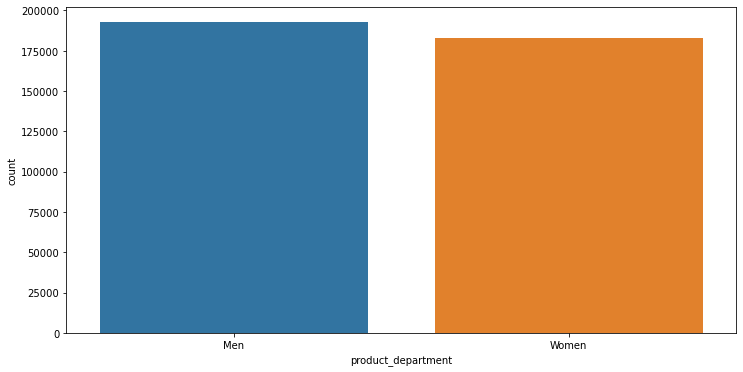

In [9]:
#Menampikan Histogram departemen product 
plot_count(x="product_department", data=data)

 **Insights:**

Dari visualisasi di atas, diperoleh:
departement / jenis product  pria paling banyak terjual atau sekitar 180000-190000 terjual, sedangkan untuk wanita hanya sekitar 175000 - 179000. Sehingga dapat dikatakan pembeli paling banyak yaitu laki-laki, hal ini jauh berbanding terbalik dari kategori produk wanita yang lebih banyak daripada laki-laki.

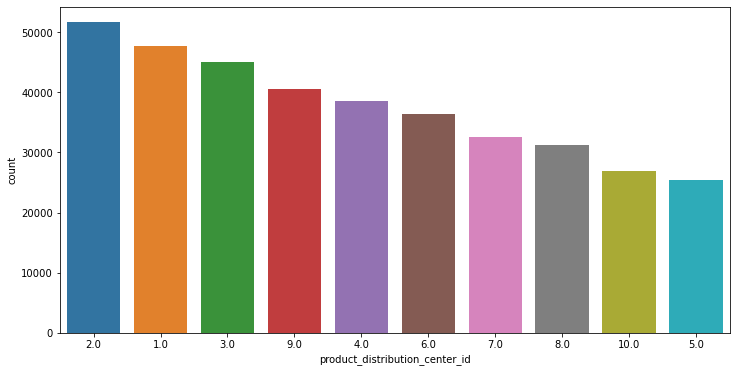

In [10]:
#menampilkan jumlah product distribution id
plot_count(x="product_distribution_center_id", data=data)

 **Insights:**

Dari visualisasi di atas:

Dapat dikatakan distribution_center_id terbanyak terletak pada nomor id '2' atau sebanyak 51000-52000. Maka dapat dikatakan pendistribusian product paling banyak terletak pada nama produk yang memiliki distribution_center_id nomor 2. dan paling sedikit terletak pada distribution_center_id nomor 10 +-260000-280000.

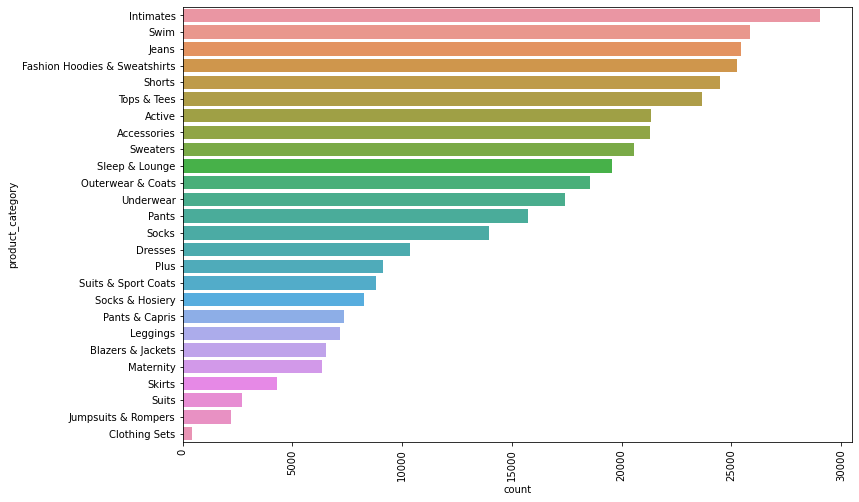

In [11]:
#menampilkan jumlah product category yang telah terjual
plot_count(y="product_category", data=data, figsize=(12, 8))
plt.xticks(rotation=90)
plt.show()


 **Insights:**

Terlihat dari visualisasi di atas:
* 5 warna yang teratas adalah:
1. Intimates
2. Swim
3. Jeans
4. Fasion hoodies & Sweatshirt
5. short

Dapat diasumsikan Kategori product no.3 Jeans & no.4 Fashion hoodies & swaeatshirt memiliki jumlah penjualan yang cukup tinggi. Karena banyak dikarenakan digunakan oleh laki-laki dan perempuan dan hanya dibedakan oleh motif / modelnya saja. maka dari itu memiliki jumlah penjualan yang tinggi. walaupun harga produk2 tersebut jauh lebih mahal dari product lainnya.



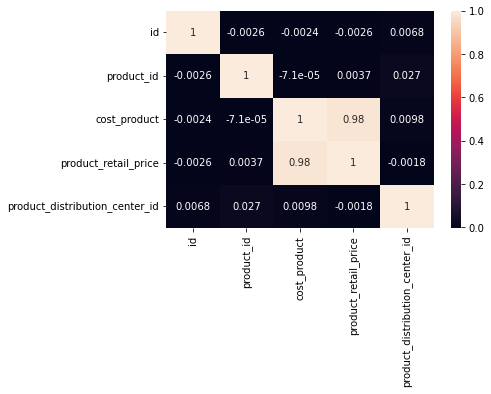

In [12]:
# Visualisasikan hubungan antar data 
sns.heatmap(data.corr(), annot=True) 
plt.show()

In [13]:
#melihat deskripsi data secara statistik
print(data.describe().T.round(2))

                                   count       mean        std   min  \
id                              375863.0  243862.04  140827.04  1.00   
product_id                      375863.0   15471.12    8465.14  1.00   
cost_product                    375863.0      26.98      27.81  0.01   
product_retail_price            375863.0      55.87      59.43  0.02   
product_distribution_center_id  375863.0       5.05       2.92  1.00   

                                      25%        50%        75%        max  
id                              121984.50  243772.00  366024.50  487390.00  
product_id                        8133.00   16346.00   22882.50   29120.00  
cost_product                        11.03      19.49      32.88     557.15  
product_retail_price                23.85      39.58      66.33     990.00  
product_distribution_center_id       2.00       5.00       8.00      10.00  


**Mendeskripsikan setiap value**

In [14]:
data.product_name.describe()

count                                                375846
unique                                                20939
top       Wrangler Men's Premium Performance Cowboy Cut ...
freq                                                    147
Name: product_name, dtype: object

In [15]:
##### melihat deskripsi brand product
data.product_brand.describe()

count        375489
unique         2018
top       Allegra K
freq          16392
Name: product_brand, dtype: object

In [16]:
#melihat deskripsi product category
data.product_category.describe()

count        375863
unique           26
top       Intimates
freq          29055
Name: product_category, dtype: object

In [17]:
#melihat deskripsi cost product
data.cost_product.describe()

count    375863.000000
mean         26.975910
std          27.814531
min           0.008300
25%          11.033400
50%          19.489821
75%          32.880000
max         557.151002
Name: cost_product, dtype: float64

In [18]:
#melihat deskripsi product retail price
data.product_retail_price.describe()

count    375863.000000
mean         55.874503
std          59.425964
min           0.020000
25%          23.850000
50%          39.580002
75%          66.330002
max         990.000000
Name: product_retail_price, dtype: float64

In [19]:
#melihat deskripsi created at
data.created_at.describe()

count                        375863
unique                       349770
top       2022-03-20 14:50:00+00:00
freq                              5
Name: created_at, dtype: object

In [20]:
#melihat deskripsi  sold at
data.sold_at.describe()

count                        139079
unique                       138877
top       2022-03-10 07:49:24+00:00
freq                              3
Name: sold_at, dtype: object

**Insights:**

Dari data diatas dapat dikatakan 
1.  Brand paling banyak dibeli yaitu Allegra K, yaitu sebanyak 375490.
2. kategori produk yang paling banyak terjual yaitu  Intimates.

3. Harga asli produk termahal yaitu 557.151002 dan termurah 0.008300 dengan rata-rata  26.975850.
4. Harga retail produk termahal 999.000000 dan termurah 0.020000 dengan rata-rata 55.874386.
5. Produk yang telah dibuat sebanyak 375865 dan Produk yang paling banyak dibuat yaitu pada tanggal 2020-10-29 07:51:00+00:00
6. Produk yang telah terjual sebanyak 139080 dan produk paling banyak terjual yaitu pada tanggal 2022-03-10 07:49:24+00:00

## **2 Data Preprocessing**
Tujuannya disini adalah untuk menghilangkan kata dan karakter yang tidak perlu agar kata-kata yang tidak bermakna untuk menambah tabel dengan PosgreSQL dan memvisualisasikan/ membuat dashboard dengan Tableau nantinya.



In [21]:
#membuang kolom product sku
data.drop(['product_sku'],axis=1,inplace=True)
data.head() #MASIH TERDAPAT BANYAK MISSING VALUE

,id,product_id,created_at,sold_at,cost_product,product_category,product_name,product_brand,product_retail_price,product_department,product_distribution_center_id
0,90967.0,16898.0,2021-07-19 02:20:10+00:00,2021-07-20 14:34:10+00:00,13.925,Tops & Tees,Quiksilver Waterman Men's On The Rise,NaN,25.0,Men,3.0
1,90968.0,16898.0,2020-04-13 07:46:00+00:00,NaN,13.925,Tops & Tees,Quiksilver Waterman Men's On The Rise,NaN,25.0,Men,3.0
2,90969.0,16898.0,2020-09-02 17:43:00+00:00,NaN,13.925,Tops & Tees,Quiksilver Waterman Men's On The Rise,NaN,25.0,Men,3.0
3,90970.0,16898.0,2021-08-19 15:17:00+00:00,NaN,13.925,Tops & Tees,Quiksilver Waterman Men's On The Rise,NaN,25.0,Men,3.0
4,96715.0,16898.0,2020-05-09 11:16:10+00:00,2020-06-23 23:59:10+00:00,13.925,Tops & Tees,Quiksilver Waterman Men's On The Rise,NaN,25.0,Men,3.0


In [22]:
#mengecek kolom yang ada missing value nya
data[data.isna().all(axis=1)]

,id,product_id,created_at,sold_at,cost_product,product_category,product_name,product_brand,product_retail_price,product_department,product_distribution_center_id
375863,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
data.isnull().sum()

id                                     1
product_id                             1
created_at                             1
sold_at                           236785
cost_product                           1
product_category                       1
product_name                          18
product_brand                        375
product_retail_price                   1
product_department                     1
product_distribution_center_id         1
dtype: int64

> **Insights:**

Dari data di atas, terlihat bahwa ada baris yang nilai fiturnya kosong.

**Insights:**
Dari data diatas terlihat ada banyak sekali missing value terutama pada kolom sold_at sebanyak 236785 dan product_brand sebanyak 375. 

Maka dari itu akan saya melakukan data cleansing!

### Data Cleansing & Data handle

In [24]:
#melihat missing value dari sold_at
print("Number of NaN Values for the columns" 'sold_at', data['sold_at'].isnull().sum())

Number of NaN Values for the columnssold_at 236785


In [25]:
#melihat missing value dari product brand
print("Number of NaN Values for the columns" 'product_brand', data['product_brand'].isnull().sum())

Number of NaN Values for the columnsproduct_brand 375


In [26]:
#melihat missing value dari product name
print("Number of NaN Values for the columns" 'product_name', data['product_name'].isnull().sum())

Number of NaN Values for the columnsproduct_name 18


In [27]:
#Mengganti missing value dengan nilai 0 pada tabel 'sold_at'
data[['sold_at']] = data[['sold_at']].fillna('2022-12-12 02:20:10+00:00')

In [28]:
#Mengganti missing value dengan Other Name pada tabel'product_Name'
data[['product_name']] = data[[ 'product_name']].fillna('Other_name')

In [29]:
#Mengganti missing value dengan Other brand pada tabel'product_brand'
data[['product_brand']] = data[[ 'product_brand']].fillna('Other_brand')

In [30]:
# Cek missing values
data[['sold_at', 'product_brand', 'product_name']].isna().sum()

sold_at          0
product_brand    0
product_name     0
dtype: int64

In [31]:
#mengecek missing value dari data
data.dropna(axis=1)

,sold_at,product_name,product_brand
0,2021-07-20 14:34:10+00:00,Quiksilver Waterman Men's On The Rise,Other_brand
1,2022-12-12 02:20:10+00:00,Quiksilver Waterman Men's On The Rise,Other_brand
2,2022-12-12 02:20:10+00:00,Quiksilver Waterman Men's On The Rise,Other_brand
3,2022-12-12 02:20:10+00:00,Quiksilver Waterman Men's On The Rise,Other_brand
4,2020-06-23 23:59:10+00:00,Quiksilver Waterman Men's On The Rise,Other_brand
...,...,...,...
375859,2020-08-03 16:30:20+00:00,Fresh Laundry Women's Long Sleeve Hoodie,Fresh Laundry
375860,2022-12-12 02:20:10+00:00,Fresh Laundry Women's Long Sleeve Hoodie,Fresh Laundry
375861,2022-06-04 11:04:28.406446+00:00,Fresh Laundry Women's Long Sleeve Hoodie,Fresh Laundry
375862,2022-12-12 02:20:10+00:00,Fresh Laundry Women's Long Sleeve Hoodie,Fresh Laundry


In [32]:
#melihat missing value dari data yang NaN nya 1
data[['cost_product','product_category','product_retail_price','product_department','product_distribution_center_id']].isna().sum()

cost_product                      1
product_category                  1
product_retail_price              1
product_department                1
product_distribution_center_id    1
dtype: int64

In [33]:
#Mengganti  missing value yang jumlahnya sedikit / 1 dengan all
data[['product_category','product_department']] = data[['product_category','product_department']].fillna('all')

In [34]:
#Mengganti missing value yang jumlahnya sedikit / 1 dengan 0
data[['product_distribution_center_id']] = data[['product_distribution_center_id']].fillna(0)

In [35]:
#Menghapus missing value yang jumlahnya sedikit / 1 dengan 0
data[['id','product_id']] = data[['id','product_id']].fillna(0)

In [36]:
#Menghapus missing value yang jumlahnya sedikit / 1 dengan 0
data[['created_at']] = data[['created_at']].fillna('2021-07-19 02:20:10+00:00')

In [37]:
#Menghapus missing value yang jumlahnya sedikit / 1 dengan 0
data[['cost_product','product_retail_price']] = data[['cost_product','product_retail_price']].fillna(0)

In [38]:

#mengecek missing value dari data yang NaN nya 1
data[['cost_product','product_category','product_retail_price','product_department','product_distribution_center_id']].isna().sum()

cost_product                      0
product_category                  0
product_retail_price              0
product_department                0
product_distribution_center_id    0
dtype: int64

In [39]:
data.isna().sum #CEK MISSING VALUE TOTAL

<bound method NDFrame._add_numeric_operations.<locals>.sum of            id  product_id  created_at  sold_at  cost_product  \
0       False       False       False    False         False   
1       False       False       False    False         False   
2       False       False       False    False         False   
3       False       False       False    False         False   
4       False       False       False    False         False   
...       ...         ...         ...      ...           ...   
375859  False       False       False    False         False   
375860  False       False       False    False         False   
375861  False       False       False    False         False   
375862  False       False       False    False         False   
375863  False       False       False    False         False   

        product_category  product_name  product_brand  product_retail_price  \
0                  False         False          False                 False   
1          

In [40]:
##melihat missing value sekali lagi
data.isna().sum()

id                                0
product_id                        0
created_at                        0
sold_at                           0
cost_product                      0
product_category                  0
product_name                      0
product_brand                     0
product_retail_price              0
product_department                0
product_distribution_center_id    0
dtype: int64

In [41]:
data.head() #sudah tidak ada missing value karena data sudah bersihkan dan diubah namanya.

,id,product_id,created_at,sold_at,cost_product,product_category,product_name,product_brand,product_retail_price,product_department,product_distribution_center_id
0,90967.0,16898.0,2021-07-19 02:20:10+00:00,2021-07-20 14:34:10+00:00,13.925,Tops & Tees,Quiksilver Waterman Men's On The Rise,Other_brand,25.0,Men,3.0
1,90968.0,16898.0,2020-04-13 07:46:00+00:00,2022-12-12 02:20:10+00:00,13.925,Tops & Tees,Quiksilver Waterman Men's On The Rise,Other_brand,25.0,Men,3.0
2,90969.0,16898.0,2020-09-02 17:43:00+00:00,2022-12-12 02:20:10+00:00,13.925,Tops & Tees,Quiksilver Waterman Men's On The Rise,Other_brand,25.0,Men,3.0
3,90970.0,16898.0,2021-08-19 15:17:00+00:00,2022-12-12 02:20:10+00:00,13.925,Tops & Tees,Quiksilver Waterman Men's On The Rise,Other_brand,25.0,Men,3.0
4,96715.0,16898.0,2020-05-09 11:16:10+00:00,2020-06-23 23:59:10+00:00,13.925,Tops & Tees,Quiksilver Waterman Men's On The Rise,Other_brand,25.0,Men,3.0


**Insights:**
Seluruh missing value sudah dibersihkan dan diubah namanya.

### Handle Data

In [42]:
# Pada kolom created at ubah tipe data menjadi datetime
data['created_at']=pd.to_datetime(data['created_at'], infer_datetime_format=True)

# Cek tipe data 
print (data.dtypes) 

id                                            float64
product_id                                    float64
created_at                        datetime64[ns, UTC]
sold_at                                        object
cost_product                                  float64
product_category                               object
product_name                                   object
product_brand                                  object
product_retail_price                          float64
product_department                             object
product_distribution_center_id                float64
dtype: object


In [43]:
# Pada kolom sold_at ubah tipe data menjadi datetime
data['sold_at']=pd.to_datetime(data['sold_at'], infer_datetime_format=True)

# Cek tipe data 
print (data.dtypes)

id                                            float64
product_id                                    float64
created_at                        datetime64[ns, UTC]
sold_at                           datetime64[ns, UTC]
cost_product                                  float64
product_category                               object
product_name                                   object
product_brand                                  object
product_retail_price                          float64
product_department                             object
product_distribution_center_id                float64
dtype: object


In [44]:
# Instruksi looping untuk mengubah tipe data pada kolom yang berakhiran dengan 'id' menggunakan function astype()
for feature in data.columns:
    if (
        feature.endswith("id")
    ):
        
        
        data[feature] = data[feature].astype("object")
print (data.dtypes)

id                                             object
product_id                                     object
created_at                        datetime64[ns, UTC]
sold_at                           datetime64[ns, UTC]
cost_product                                  float64
product_category                               object
product_name                                   object
product_brand                                  object
product_retail_price                          float64
product_department                             object
product_distribution_center_id                 object
dtype: object


In [45]:
#Get the lowest and highest dates in the dataset.
data['created_at'].min() , data['created_at'].max()

(Timestamp('2018-11-11 19:28:08+0000', tz='UTC'),
 Timestamp('2022-06-06 17:12:33.005180+0000', tz='UTC'))

In [46]:
#Get the lowest and highest dates in the dataset.
data['sold_at'].min() , data['sold_at'].max()

(Timestamp('2019-01-05 05:39:08+0000', tz='UTC'),
 Timestamp('2022-12-12 02:20:10+0000', tz='UTC'))

In [47]:
#Mengurutkan data date
data = data[(data['created_at']>='2018-11-11 19:28:08+0000') & (data['created_at']<='2022-06-06 17:12:33.005180+0000')].sort_values('created_at', ascending=True)

C:\Users\62856\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


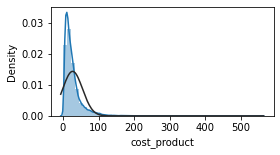

<Figure size 288x144 with 0 Axes>

In [48]:
#Lets check the ditribution of the target variable (cost_product)
from matplotlib import rcParams
# figure size in inches
rcParams['figure.figsize'] = 4,2

sb.distplot(data['cost_product'], fit=norm)

#Get the QQ-plot
fig = plt.figure()
plt.show()

#### Univariate Analysis - product name, product brand, Product Category.


In [49]:
#Mengurutkan data pada variabel product category dari kategori produk yang banyak digemari 
data['product_category'].value_counts().sort_values(ascending = False)

Intimates                        29055
Swim                             25833
Jeans                            25436
Fashion Hoodies & Sweatshirts    25259
Shorts                           24476
Tops & Tees                      23665
Active                           21361
Accessories                      21304
Sweaters                         20588
Sleep & Lounge                   19552
Outerwear & Coats                18558
Underwear                        17419
Pants                            15739
Socks                            13939
Dresses                          10381
Plus                              9117
Suits & Sport Coats               8817
Socks & Hosiery                   8282
Pants & Capris                    7370
Leggings                          7176
Blazers & Jackets                 6555
Maternity                         6345
Skirts                            4282
Suits                             2689
Jumpsuits & Rompers               2225
Clothing Sets            

In [50]:
#Mencari tahu brand product yang digemari
data['product_brand'].value_counts().sort_values(ascending = False)

Allegra K       16392
Calvin Klein     8607
Carhartt         6819
Hanes            5227
Volcom           5164
                ...  
NEVE                4
Wayfayrer           3
Empress Silk        2
Boob                2
funzee              2
Name: product_brand, Length: 2019, dtype: int64

In [51]:
#mencari tahu nama product yang paling banyak terjual
data['product_name'].value_counts().sort_values(ascending = False)

Wrangler Men's Premium Performance Cowboy Cut Jean                               147
Wrangler Men's Rugged Wear Classic Fit Jean                                       98
Thorlo Unisex Experia Running Sock                                                95
HUGO BOSS Men's Long Pant                                                         91
Puma Men's Socks                                                                  91
                                                                                ... 
Cosabella Women's Soire Lr Hotpant                                                 2
Ilusion Women's Sexy Low-rise Leopard Print Lacy Bikini Panty BAROQ FLOWERS L      2
Le Suit Safari Nights Skirt Suit                                                   2
adidas Women's Zip Pindot Hoody                                                    2
Lamaze Maternity Women's Seamless V-Neck Cami-Thin Straps                          2
Name: product_name, Length: 20940, dtype: int64

27


C:\Users\62856\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='product_category', ylabel='count'>

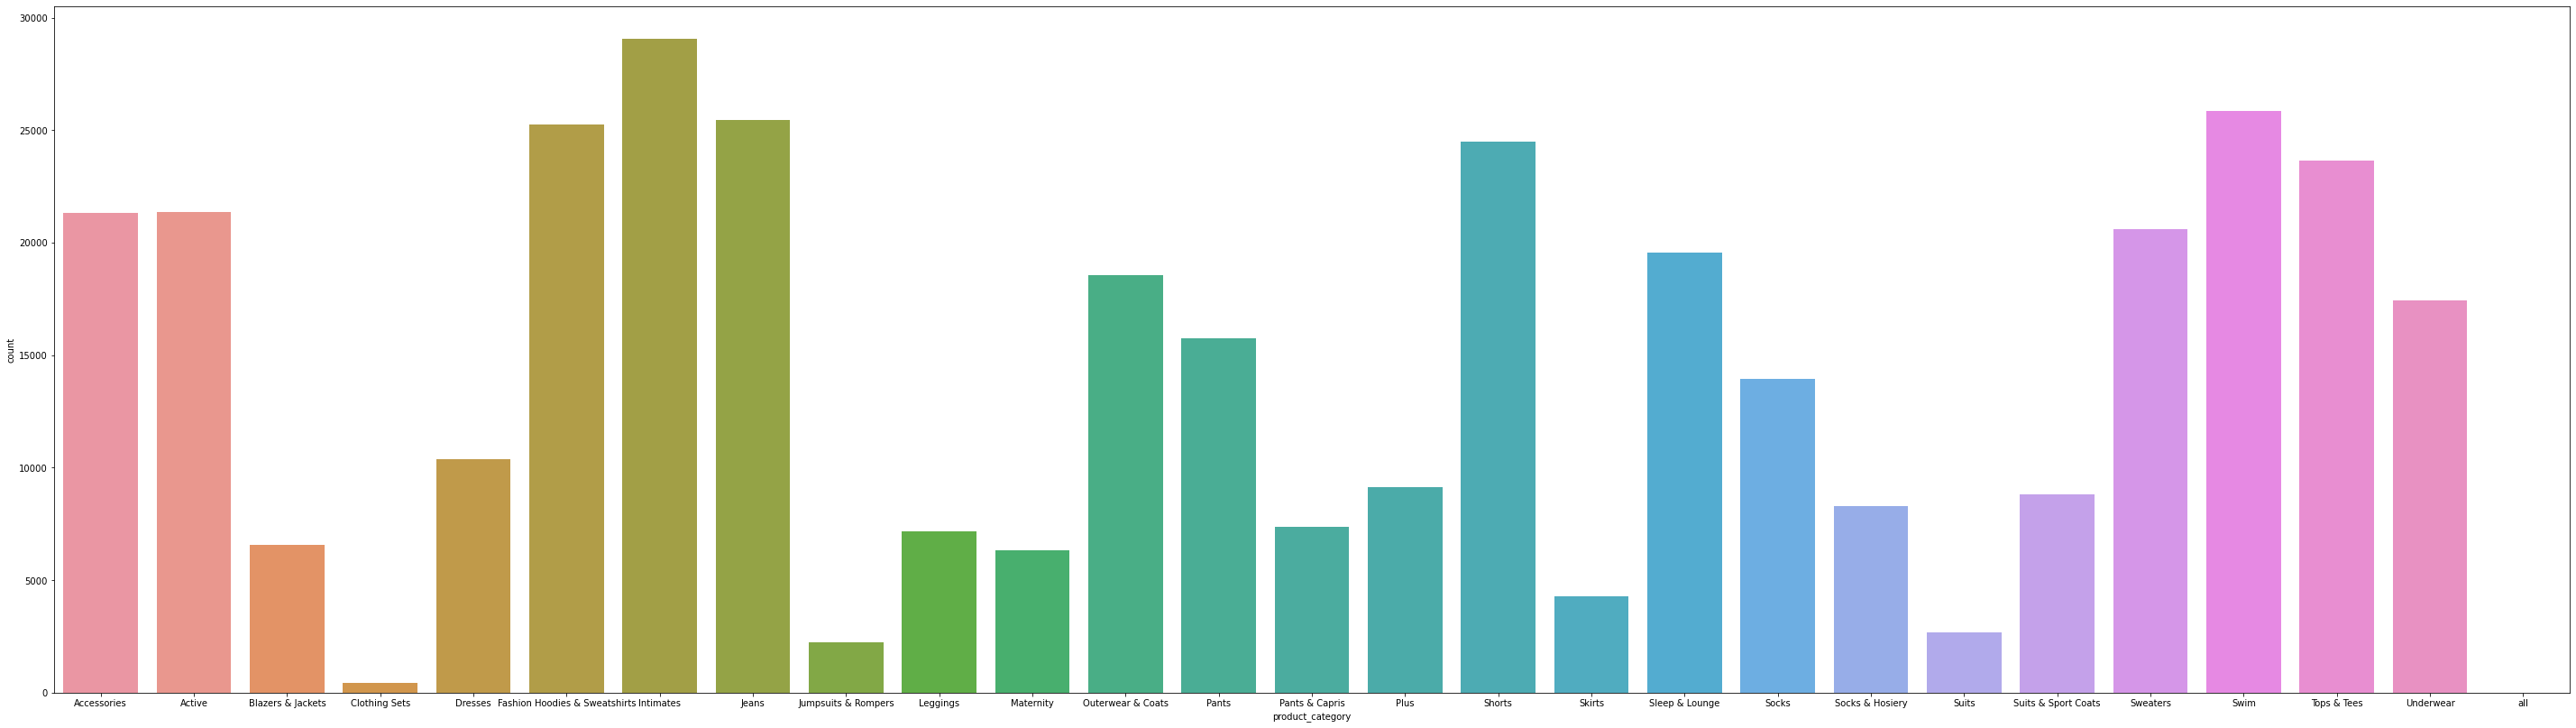

In [52]:
#Mneampilkan visualisasi kelas berdasarkan Jumlah produk terjual pada Product Category.

print (len(data['product_category'].value_counts()))

rcParams['figure.figsize'] = 50,14
sb.countplot(data['product_category'].sort_values(ascending = True))


#### Bivariate Analysis - id distribution center dan product_retail_price

C:\Users\62856\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\62856\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


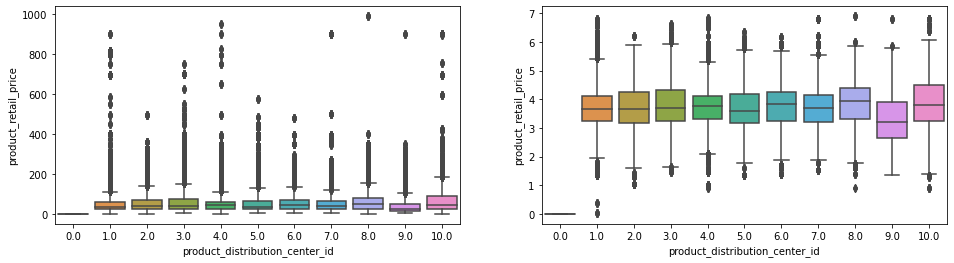

In [53]:
#Membagi kelas product retail price berdasarkan product_distribution_center_id

#Checking with Boxplots
from matplotlib import rcParams
# figure size in inches
rcParams['figure.figsize'] = 16,4
f, axes = plt.subplots(1, 2)
#Regular Data
fig3 = sb.boxplot( data['product_distribution_center_id'],data['product_retail_price'], ax = axes[0])
#Data with Log Transformation
fig4 = sb.boxplot( data['product_distribution_center_id'], np.log1p(data['product_retail_price']),ax = axes[1])

del fig3, fig4

C:\Users\62856\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


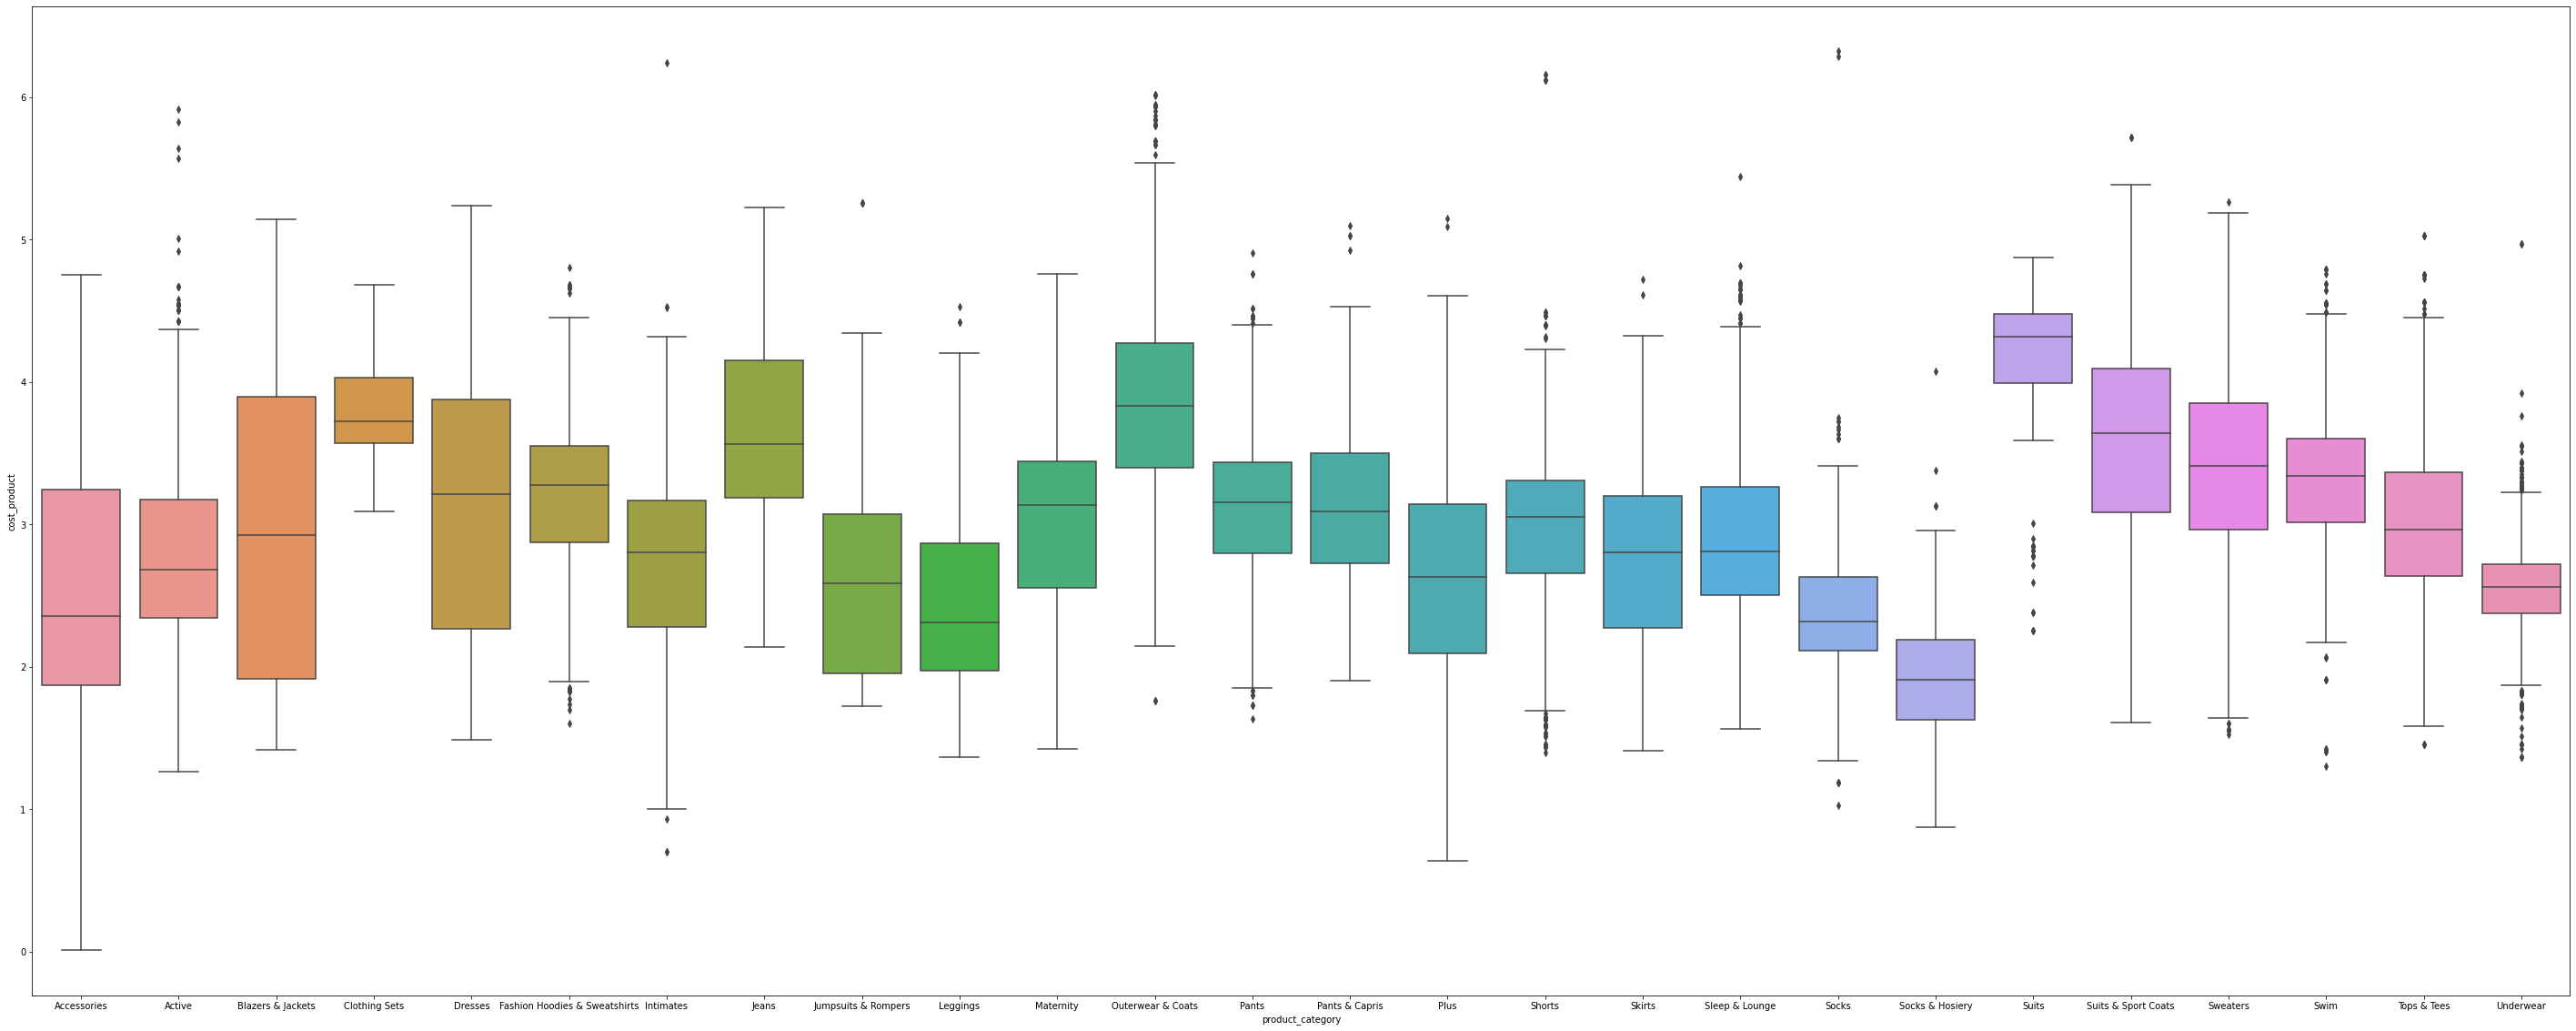

In [54]:
#MENGKLASIFIKASIKAN product_category berdasarkan harga asli
rcParams['figure.figsize'] = 50,20
#Taking subset of data temporarily for in memory compute.
df_temp = data.sample(n=20000).reset_index()
fig5 = sb.boxplot( df_temp['product_category'].sort_values(),np.log1p(df_temp['cost_product']))
del df_temp, fig5

# MODELLING DATA

## Choosing the Best Model
### Splitting the Training Data
We will use part of our training data (25% in this case) to test the accuracy of our different models.

In [55]:
#menentukan variabel independen dan dependen 
X = data[['cost_product', 'product_retail_price','product_id']]
y = data['product_department']


       

In [56]:
#melihat daftar kolom
data.columns

Index(['id', 'product_id', 'created_at', 'sold_at', 'cost_product',
       'product_category', 'product_name', 'product_brand',
       'product_retail_price', 'product_department',
       'product_distribution_center_id'],
      dtype='object')

In [57]:
#membagi pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### Testing Different Models
Saya masih penasaran dengan hasil testing dan masih ingin mencoba dengan model lainnya. berikut adalah daftarnya:

1. Gaussian Naive Bayes
2. Logistic Regression
3. Support Vector Machines
4. Perceptron
5. Stochastic Gradient Descent
6. Linear SVC

####  Gaussian Naive Bayes

In [58]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)
acc_gaussian = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_gaussian)

99.45


In [59]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         Men       0.99      1.00      0.99     48009
       Women       1.00      0.99      0.99     45957

    accuracy                           0.99     93966
   macro avg       0.99      0.99      0.99     93966
weighted avg       0.99      0.99      0.99     93966



####  Support Vector Machines

In [60]:
# Support Vector Machines
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
acc_svc = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_svc)

99.95


In [61]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         Men       1.00      1.00      1.00     48009
       Women       1.00      1.00      1.00     45957

    accuracy                           1.00     93966
   macro avg       1.00      1.00      1.00     93966
weighted avg       1.00      1.00      1.00     93966



#### Linear SVC

In [62]:
# Linear SVC
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_linear_svc)

C:\Users\62856\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


69.58


In [63]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         Men       0.63      1.00      0.77     48009
       Women       1.00      0.38      0.55     45957

    accuracy                           0.70     93966
   macro avg       0.81      0.69      0.66     93966
weighted avg       0.81      0.70      0.66     93966



#### Perceptron

In [64]:
# Perceptron
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, y_train)
y_pred = perceptron.predict(X_test)
acc_perceptron = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_perceptron)

70.21


In [65]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         Men       0.65      0.89      0.75     48009
       Women       0.82      0.50      0.62     45957

    accuracy                           0.70     93966
   macro avg       0.74      0.70      0.69     93966
weighted avg       0.73      0.70      0.69     93966



#### Stochastic Gradient Descent

In [66]:
# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
acc_sgd = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_sgd)

96.4


In [67]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         Men       0.93      1.00      0.97     48009
       Women       1.00      0.93      0.96     45957

    accuracy                           0.96     93966
   macro avg       0.97      0.96      0.96     93966
weighted avg       0.97      0.96      0.96     93966



#### Logistic Regression

In [68]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
acc_logreg = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_logreg)

C:\Users\62856\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


97.85


In [69]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         Men       0.98      0.98      0.98     48009
       Women       0.98      0.97      0.98     45957

    accuracy                           0.98     93966
   macro avg       0.98      0.98      0.98     93966
weighted avg       0.98      0.98      0.98     93966



#### Hasil score seluruh pemodelan

In [71]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Logistic Regression', 'Naive Bayes', 'Perceptron', 'Linear SVC', 
               'Stochastic Gradient Descent'],
    'Score': [acc_svc, acc_logreg, 
              acc_gaussian, acc_perceptron,acc_linear_svc,
              acc_sgd ]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Support Vector Machines,99.95
2,Naive Bayes,99.45
1,Logistic Regression,97.85
5,Stochastic Gradient Descent,96.40
3,Perceptron,70.21
4,Linear SVC,69.58


In [72]:
y_test #Men = class 1 Woman class 2

355525      Men
188021    Women
60276     Women
210772    Women
93949       Men
          ...  
193079      Men
330559    Women
203214      Men
198679    Women
125226    Women
Name: product_department, Length: 93966, dtype: object

In [73]:
y_pred

array(['Men', 'Women', 'Women', ..., 'Men', 'Women', 'Women'],
      dtype=object)

In [74]:
X

,cost_product,product_retail_price,product_id
372352,44.771998,79.949997,17357.0
139534,17.762220,46.619999,18164.0
133854,4.530330,7.990000,25062.0
274235,12.192000,32.000000,27101.0
264445,49.786172,129.990005,20334.0
...,...,...,...
248139,30.445649,69.989998,13265.0
308171,10.492100,23.900000,26451.0
48774,6.797700,13.650000,10829.0
69431,54.730000,130.000000,3126.0


#### Confussion Matrix

Text(0.5, 69.0, 'Predicted Class')

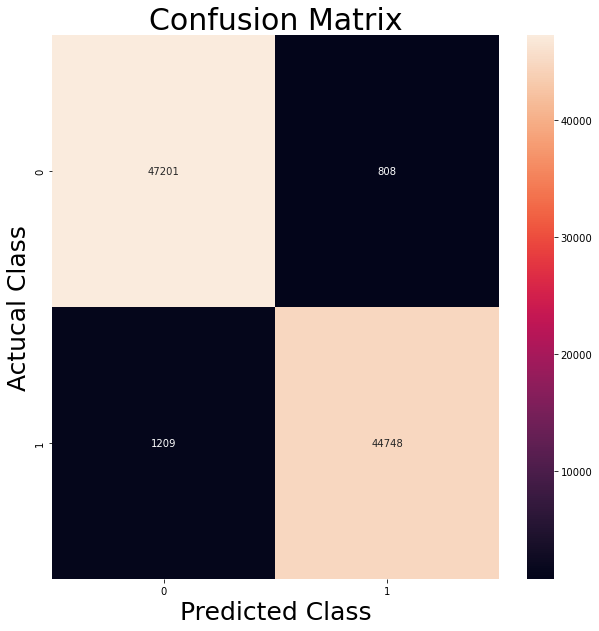

In [75]:
#Menampilkan confussion Matrix
from sklearn.metrics import classification_report,confusion_matrix
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='g')
plt.title('Confusion Matrix',color='Black',fontsize=30)
plt.ylabel('Actucal Class',fontsize=25)
plt.xlabel('Predicted Class',fontsize=25)



##### Insight
confusion matrix memberikan informasi perbandingan hasil klasifikasi yang dilakukan oleh sistem (model) dengan hasil klasifikasi sebenarnya.

- 44748 data positif yang diprediksi benar. yang mana diprediksi product untuk men.

- 47201 data negatif yang diprediksi benar. dari model yang dibuat memprediksi product tersebut untuk woman (class 2).

- 1209 data negatif namun diprediksi sebagai data positif. product tersebut termasuk departemen woman (class 2) tetapi dari model yang telah memprediksi product departemen men (class 1).

- 808 data positif namun diprediksi sebagai data negatif. contohnya termasuk pada departemen product men (class 1) tetapi dari model yang dibuat memprediksi termasuk departemen woman(class 2).


NOTE :

Men = class 1,
Woman = class 2


In [76]:
#import dataset
data.to_csv('inventory_item_fix.csv')

### **END**

BY : NADIRA

#### INFO
DATA SECONDARY TIDAK PERLU DI MODELKAN DIKARENAKAN DATA TERSEBUT AKAN DIGUNAKAN PADA TOOLS LAINNYA SEPERTI TABLEAU / SQL MAKA DARI ITU SAYA HANYA MENGEKPLORASI DATA TERSEBUT,MEMBERSIHKAN DAN MENGUBAH TIPE DATANYA.




## **Data Secondary (Orders)**

## **1 Libraries**

In [77]:
#IMPORT DATSET
data2 = pd.read_csv('orders.csv')
data2.head() # Mengimpor File dan memunculkan data head.

,order_id,user_id,status,gender,created_at,returned_at,shipped_at,delivered_at,num_of_item
0,11,9,Shipped,F,2021-12-11 05:34:00+00:00,NaN,2021-12-12 10:01:00+00:00,NaN,3
1,12,9,Shipped,F,2022-01-18 05:34:00+00:00,NaN,2022-01-19 20:20:00+00:00,NaN,1
2,22,14,Shipped,F,2020-08-18 11:51:00+00:00,NaN,2020-08-20 16:45:00+00:00,NaN,1
3,25,16,Shipped,F,2020-12-16 08:35:00+00:00,NaN,2020-12-17 21:43:00+00:00,NaN,2
4,26,16,Shipped,F,2020-09-07 08:35:00+00:00,NaN,2020-09-10 00:15:00+00:00,NaN,1


In [78]:
#MELIHAT DESKRIPSI DATA
data2.describe()

,order_id,user_id,num_of_item
count,124512.000000,124512.000000,124512.000000
mean,62256.500000,50050.013613,1.449724
std,35943.662696,28800.914580,0.802567
min,1.000000,1.000000,1.000000
25%,31128.750000,25151.000000,1.000000
50%,62256.500000,50071.500000,1.000000
75%,93384.250000,74949.250000,2.000000
max,124512.000000,100000.000000,4.000000


INSIGHT

Data tersebut terdapat kolom order id yg sudah ada dalam dataset primary. maka dari itu saya akan menghapus kolom yang tidak dibutuhkan.


In [79]:

data2.tail(
) # Fungsi yang menampilkan n baris terakhir dari kumpulan data.

,order_id,user_id,status,gender,created_at,returned_at,shipped_at,delivered_at,num_of_item
124507,124467,99958,Processing,M,2022-05-14 09:32:00+00:00,NaN,NaN,NaN,1
124508,124468,99958,Processing,M,2022-05-25 09:32:00+00:00,NaN,NaN,NaN,1
124509,124491,99980,Processing,M,2021-10-07 00:32:00+00:00,NaN,NaN,NaN,2
124510,124502,99991,Processing,M,2021-05-31 14:50:00+00:00,NaN,NaN,NaN,1
124511,124512,100000,Processing,M,2021-06-08 09:25:00+00:00,NaN,NaN,NaN,1


In [80]:
data2.info() # Melihat informasi data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124512 entries, 0 to 124511
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   order_id      124512 non-null  int64 
 1   user_id       124512 non-null  int64 
 2   status        124512 non-null  object
 3   gender        124512 non-null  object
 4   created_at    124512 non-null  object
 5   returned_at   12149 non-null   object
 6   shipped_at    80884 non-null   object
 7   delivered_at  43418 non-null   object
 8   num_of_item   124512 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 8.5+ MB


In [81]:
# Pada kolom created_at ubah tipe data menjadi datetime
data2['created_at']=pd.to_datetime(data2['created_at'], infer_datetime_format=True)

# Cek tipe data 
print (data2.dtypes)

order_id                      int64
user_id                       int64
status                       object
gender                       object
created_at      datetime64[ns, UTC]
returned_at                  object
shipped_at                   object
delivered_at                 object
num_of_item                   int64
dtype: object


In [82]:
6# Pada kolom shipped_at ubah tipe data menjadi datetime
data2['shipped_at']=pd.to_datetime(data2['shipped_at'], infer_datetime_format=True)

# Cek tipe data 
print (data2.dtypes)

order_id                      int64
user_id                       int64
status                       object
gender                       object
created_at      datetime64[ns, UTC]
returned_at                  object
shipped_at      datetime64[ns, UTC]
delivered_at                 object
num_of_item                   int64
dtype: object


In [83]:
# Pada kolom 'delivered_at' ubah tipe data menjadi datetime
data2['delivered_at']=pd.to_datetime(data2['delivered_at'], infer_datetime_format=True)

# Cek tipe data 
print (data2.dtypes)

order_id                      int64
user_id                       int64
status                       object
gender                       object
created_at      datetime64[ns, UTC]
returned_at                  object
shipped_at      datetime64[ns, UTC]
delivered_at    datetime64[ns, UTC]
num_of_item                   int64
dtype: object


In [84]:
# Pada kolom sold_at ubah tipe data menjadi datetime
data2['returned_at']=pd.to_datetime(data2['returned_at'], infer_datetime_format=True)

# Cek tipe data 
print (data2.dtypes)

order_id                      int64
user_id                       int64
status                       object
gender                       object
created_at      datetime64[ns, UTC]
returned_at     datetime64[ns, UTC]
shipped_at      datetime64[ns, UTC]
delivered_at    datetime64[ns, UTC]
num_of_item                   int64
dtype: object


In [85]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124512 entries, 0 to 124511
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype              
---  ------        --------------   -----              
 0   order_id      124512 non-null  int64              
 1   user_id       124512 non-null  int64              
 2   status        124512 non-null  object             
 3   gender        124512 non-null  object             
 4   created_at    124512 non-null  datetime64[ns, UTC]
 5   returned_at   12149 non-null   datetime64[ns, UTC]
 6   shipped_at    80884 non-null   datetime64[ns, UTC]
 7   delivered_at  43418 non-null   datetime64[ns, UTC]
 8   num_of_item   124512 non-null  int64              
dtypes: datetime64[ns, UTC](4), int64(3), object(2)
memory usage: 8.5+ MB


SEMUA TIPE DATA YANG BERAKHIRAN AT TELAH DIGANTI MENJADI DATETIME

## **2 Exploratory Data Analysis**
Langkah-langkah yang akan kita lakukan untuk EDA adalah sebagai berikut:

In [86]:
#MELIHAT PANJANG KOLOM DAN BARIS
data2.shape

(124512, 9)

In [87]:
#FUNGSI UNTUK MENAMPILKNA VISUALISASI
def plot_count(data, x=None, y=None, palette=None, figsize=(12, 6), **kwargs):
    column_order = data2[x or y].value_counts().index

    plt.figure(figsize=figsize)
    sns.countplot(
        x=x, y=y, data=data2, order=column_order,
        palette=palette, **kwargs
    )
    plt.grid(False)


MAIN_COLOR = ["#29B5BF"]    # warna utama untuk visualisasi
OTHER_COLOR = ["#777777"]    # warna lainnya untuk visualisasi

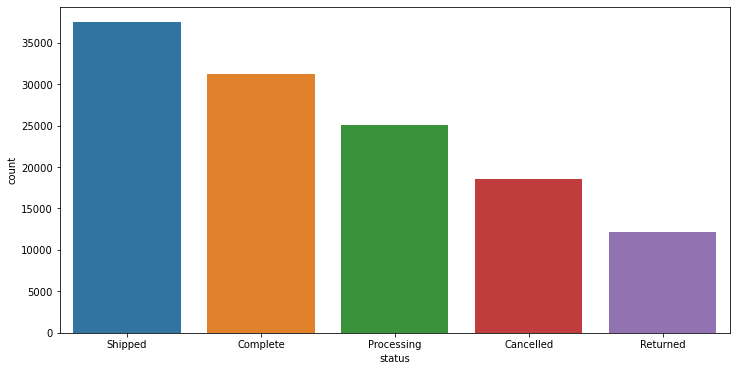

In [88]:
#HISTOGRAM STATUS PRODUCT
plot_count(x="status", data=data2)

Insights:

Dari visualisasi di atas, dilihat bahwa: status product yang  diorder paling banyak terletak pada status shiped atau pengeriman, dan yang paling sedikit yaitu status returned atau pengembalian.

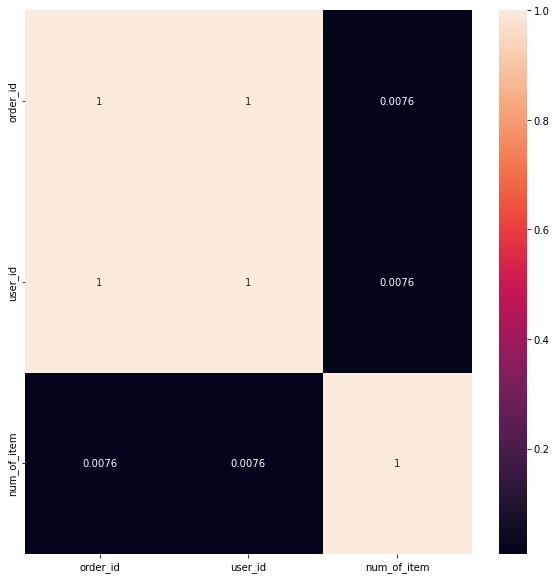

In [89]:
from sklearn.metrics import classification_report,confusion_matrix
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data2.corr(), annot=True)
plt.show()

Insights:



In [90]:
#MELIHAT KOLOM DATA
data2.columns

Index(['order_id', 'user_id', 'status', 'gender', 'created_at', 'returned_at',
       'shipped_at', 'delivered_at', 'num_of_item'],
      dtype='object')

## **2 Data Preprocessing**
Tujuannya disini adalah untuk menghilangkan kata dan karakter yang tidak perlu agar kata-kata yang tidak bermakna untuk menambah tabel dengan PosgreSQL dan memvisualisasikan/ membuat dashboard dengan Tableau nantinya.

In [91]:
#MEMBUANG KOLOM CREATED AT KARENA SUDAH ADA DALAM DATA PRIMARY
data2.drop(['created_at'],axis=1,inplace=True)
data2.head() #MASIH TERDAPAT BANYAK MISSING VALUE

,order_id,user_id,status,gender,returned_at,shipped_at,delivered_at,num_of_item
0,11,9,Shipped,F,NaT,2021-12-12 10:01:00+00:00,NaT,3
1,12,9,Shipped,F,NaT,2022-01-19 20:20:00+00:00,NaT,1
2,22,14,Shipped,F,NaT,2020-08-20 16:45:00+00:00,NaT,1
3,25,16,Shipped,F,NaT,2020-12-17 21:43:00+00:00,NaT,2
4,26,16,Shipped,F,NaT,2020-09-10 00:15:00+00:00,NaT,1


In [92]:
#MELIHAT MISSING VALUE
data2.isna().sum() #Terdapat banyak sekali missing value dalam data ini terutama untuk date hal tersebut dikarenakan status pengiriman belum masih dalam proses

order_id             0
user_id              0
status               0
gender               0
returned_at     112363
shipped_at       43628
delivered_at     81094
num_of_item          0
dtype: int64

Setelah data item order dicek, ternyata Terdapat banyak sekali missing value / NaT dalam data ini terutama untuk date status, hal tersebut dikarenakan status product masih dalam proses. maka dari itu tidak saya cleansing.


In [93]:

data2.dropna(axis=1)

,order_id,user_id,status,gender,num_of_item
0,11,9,Shipped,F,3
1,12,9,Shipped,F,1
2,22,14,Shipped,F,1
3,25,16,Shipped,F,2
4,26,16,Shipped,F,1
...,...,...,...,...,...
124507,124467,99958,Processing,M,1
124508,124468,99958,Processing,M,1
124509,124491,99980,Processing,M,2
124510,124502,99991,Processing,M,1


In [94]:
data2.isna().sum()

order_id             0
user_id              0
status               0
gender               0
returned_at     112363
shipped_at       43628
delivered_at     81094
num_of_item          0
dtype: int64

In [95]:
#MELIHAT DATA TERATAS
data2.head() 

,order_id,user_id,status,gender,returned_at,shipped_at,delivered_at,num_of_item
0,11,9,Shipped,F,NaT,2021-12-12 10:01:00+00:00,NaT,3
1,12,9,Shipped,F,NaT,2022-01-19 20:20:00+00:00,NaT,1
2,22,14,Shipped,F,NaT,2020-08-20 16:45:00+00:00,NaT,1
3,25,16,Shipped,F,NaT,2020-12-17 21:43:00+00:00,NaT,2
4,26,16,Shipped,F,NaT,2020-09-10 00:15:00+00:00,NaT,1


In [96]:
#EXPORT DATSET YANG TELAH DIBERSIHKAN
data2.to_csv('order_clean.csv')

## **Data Secondary (Distribution_Centers)**

In [97]:
#MENGIMPORT DATA
data3 = pd.read_csv('distribution_centers.csv')
data3.head() # Mengimpor File dan memunculkan data head.

,id,name,latitude,longitude
0,1,Memphis TN,35.1174,-89.9711
1,2,Chicago IL,41.8369,-87.6847
2,3,Houston TX,29.7604,-95.3698
3,4,Los Angeles CA,34.0500,-118.2500
4,5,New Orleans LA,29.9500,-90.0667


In [98]:
#MELIHAT INFO DATA
data3.info() # Melihat informasi data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         10 non-null     int64  
 1   name       10 non-null     object 
 2   latitude   10 non-null     float64
 3   longitude  10 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 448.0+ bytes


In [99]:
# Instruksi looping untuk mengubah tipe data pada kolom menggunakan function astype()
for feature in data3.columns:
    if (
        feature.endswith("latitude")
    ):
        
        
        data3[feature] = data3[feature].astype("object")
print (data3.dtypes)

id             int64
name          object
latitude      object
longitude    float64
dtype: object


In [100]:
# Instruksi looping untuk mengubah tipe data pada kolom dengan menggunakan function astype()
for feature in data3.columns:
    if (
        feature.endswith("longitude")
    ):
        
        
        data3[feature] = data3[feature].astype("object")
print (data3.dtypes)

id            int64
name         object
latitude     object
longitude    object
dtype: object


## **2 Exploratory Data Analysis**
Langkah-langkah yang akan kita lakukan untuk EDA adalah sebagai berikut:

In [101]:
#MELIHAT PANJANG DATA
data3.shape

(10, 4)

In [102]:
#MELIHAT KOLOM DATA
data3.columns

Index(['id', 'name', 'latitude', 'longitude'], dtype='object')

## **2 Data Preprocessing**
Tujuannya disini adalah untuk menghilangkan kata dan karakter yang tidak perlu agar kata-kata yang tidak bermakna untuk menambah tabel dengan PosgreSQL dan memvisualisasikan/ membuat dashboard dengan Tableau nantinya.

In [103]:
data3.isna().sum() #Tidak ada missing value maka dari itu tidak perlu di cleansing

id           0
name         0
latitude     0
longitude    0
dtype: int64

In [104]:
data3.head() #MELIHAT DATA HEAD

,id,name,latitude,longitude
0,1,Memphis TN,35.1174,-89.9711
1,2,Chicago IL,41.8369,-87.6847
2,3,Houston TX,29.7604,-95.3698
3,4,Los Angeles CA,34.05,-118.25
4,5,New Orleans LA,29.95,-90.0667


In [105]:
data3.to_csv('distribution_centers_clean.csv')

### Selanjutnya menggunakan tools PostgreSQL untuk memanipulasi data dan terakhir memvisualisasikan dengan tools Tableau dan membuat dashboard